In [2]:
import numpy as np
import math

### Load the data

There is some data is the file called 'data.csv'. The values are delimited by commas, with comments marked at the beginning of the line with a #.

Using the numpy function "genfromtxt" or otherwise load th ata into a numpy array with the first column being the force adn the second being the strain. Print the resulting array.

In [5]:
array = np.genfromtxt("data.csv", delimiter=",")

print(array)

[[ 2.98000000e+01  0.00000000e+00]
 [ 2.94000000e+01 -1.36240000e-05]
 [ 2.97000000e+01  0.00000000e+00]
 ...
 [ 4.26000000e+00  4.06730245e-01]
 [ 3.85000000e+00  4.06730245e-01]
 [ 4.85000000e+00  4.06730245e-01]]


### Process the data

Using the information in the header of the data file, calculate the true stress from the force, in units of pascals. Remember that true stress has the form:

$$
\sigma_\text{T} = \sigma ( 1 + \varepsilon)
$$

You should assign the resultant array to the variablename "true_stress". Also assign the strain to the name "true_strain". (These strains are the true strains)

In [25]:
stress = (array[:,0])*4/(1e-6*np.pi*4.93**2)
true_strain = array[:,1]
true_stress = []


for i in range (len(stress)):
    comp = stress[i]*(1+true_strain[i])
    true_stress.append(comp)
    
   
print(true_stress[0])
print(len(true_strain))


1561106.543664358
999


In [26]:
# Check to see if you've managed it:
def check_var(var):
    try:
        var
        return True
    except NameError:
        return False
    
if check_var(true_stress):
    print('Stress is defined')
if check_var(true_strain):
    print('Strain is defined')
if len(true_strain) == len(true_stress):
    print("The data match sizes")
if math.fabs(true_stress[0] - 1561106.54) < 0.1:
    print('Units seem to match')

Stress is defined
Strain is defined
The data match sizes
Units seem to match


### Plotting the data

Import the pyplot module from the matplotlib package. Plot the data.

In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Define a function

One empirical function that is used to fit stress-strain data in called the Voce curve. The function should take strain as the first argument, in the form of a 1-D array. The remaining arguments should be the parameters of the Voce curve.

The curve follows the form:

$$
\sigma = \sigma_\text{s} - (\sigma_{s} - \sigma_{\text{y}}) \exp \left(- \frac{\varepsilon_\text{P}}{\varepsilon_0} \right)
$$

where $\sigma_s$ is the saturation stress, $\sigma_\text{y}$ is the yield stress, $\varepsilon_\text{P}$ is the plastic strain and $\varepsilon_0$ is a characteristic value of the exponential.

The data file contains plastic strain.

The function should return stress as an array with the same size and shape as the strain array, and with units of pascals

In [28]:
def voce(strain, sigma_s, sigma_y, epsilon_0):
    # Put some code here to make the Voce work
    stress = []
    for i in range(len(strain)):
        stress.append(sigma_s - (sigma_s - sigma_y)*np.exp(-strain[i]/epsilon_0))
    
    return stress

In [33]:
# Check
_test = np.array([0.2, 0.8])
print (_test)
_result = voce(_test, 10, 30, 0.5)
print (_result)
#error = np.sum(_result - 23.4064)
#if math.fabs(error) < 0.001:
#    print('Voce seems to work')

[0.2 0.8]
[23.406400920712787, 14.037930359893107]


### Tricky - fit the parameters to the data

Import the optimise module from the scipy package. Use the minimise function to determine the values of the Voce curve parameters that best fit the data. 

Plot your estimates of the stress using these parameters and the Voce curve on the same axes as the experiment.

In [47]:
import scipy.optimize as sc


sc.curve_fit(voce, true_strain, true_stress)

(array([3.02820774e+08, 2.14013552e+07, 1.22888845e-01]),
 array([[3.95751031e+12, 2.53043184e+12, 5.74339897e+03],
        [2.53043184e+12, 9.63640634e+12, 7.32981301e+03],
        [5.74339897e+03, 7.32981301e+03, 1.18944333e-05]]))

240884510.8374872
237962062.84838215


<function matplotlib.pyplot.show(*args, **kw)>

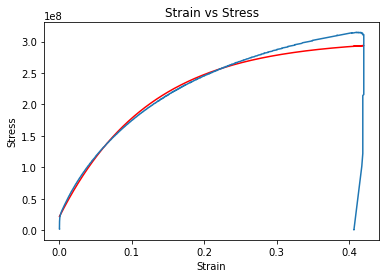

In [58]:
voce_stress = voce(true_strain, 3.02820774e+08, 2.14013552e+07, 1.22888845e-01)
print(voce_stress[400])
print(true_stress[400])
plt.plot(true_strain,voce_stress,'r')
plt.plot(true_strain,true_stress)
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title("Strain vs Stress")
plt.show